This notebook is prepared by Ahmet Melek for inzva deep learning study group #3.

In [0]:
#Download an image

!curl https://images.squarespace-cdn.com/content/v1/58a59506414fb5112de476f0/1563361002514-JHHD107OOORUOYLVBSAW/ke17ZwdGBToddI8pDm48kGYFBXRirSkcN0DDTvWSfdZZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpxfEIEfjwMmvyUhobtWyoHWlw_CGfynOj036h33atmEnrR5AzL9cTAc-n-wW6dixug/inzva --output resim.png


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12335  100 12335    0     0   116k      0 --:--:-- --:--:-- --:--:--  118k


In [0]:
#See the current directory

!ls

resim.png  sample_data


When we open the image, the shape is: (282, 598, 4)
When we convert to binary, the shape is: (282, 598)


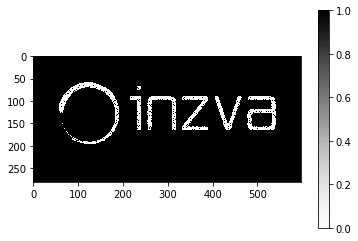

In [0]:
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#Open image
img=Image.open('resim.png')
print('When we open the image, the shape is:',np.shape(img))

#Ignore the depth channel
img_arr = np.array(img)
img_arr = img_arr[:,:,:3]

#Convert to binary
img = Image.fromarray(img_arr)
img = img.convert('1')
print('When we convert to binary, the shape is:',np.shape(img))

#Binary has True False values. Convert them to integers.
img = np.array(img,dtype = int)
imgplot = plt.imshow(img,cmap = 'Greys')

plt.colorbar()
plt.show()

In [0]:
#Setup the model

from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(1,(3,3), input_shape = (282,598,1),use_bias = False,padding='same'))

model.compile(optimizer='Adam',loss = 'mean_squared_error')

Using TensorFlow backend.


In [0]:
#Define a custom kernel 

import numpy as np

mykernel = [[1,0,-1],[1,0,-1],[1,0,-1]]
mykernel = np.array(mykernel)
mykernel = mykernel.reshape((3,3,1,1))
print(np.shape(mykernel))

(3, 3, 1, 1)


In [0]:
#Check weights before setting 

print(model.layers[0].get_weights())
print(np.shape(model.layers[0].get_weights()))







[array([[[[ 0.27706593]],

        [[-0.45883948]],

        [[-0.3992232 ]]],


       [[[-0.4412825 ]],

        [[-0.47586015]],

        [[-0.01148081]]],


       [[[ 0.19478351]],

        [[-0.39581677]],

        [[ 0.05040205]]]], dtype=float32)]
(1, 3, 3, 1, 1)


In [0]:
#Set weights and check weights after setting 

model.layers[0].set_weights([mykernel])
print(model.layers[0].get_weights())

[array([[[[ 1.]],

        [[ 0.]],

        [[-1.]]],


       [[[ 1.]],

        [[ 0.]],

        [[-1.]]],


       [[[ 1.]],

        [[ 0.]],

        [[-1.]]]], dtype=float32)]


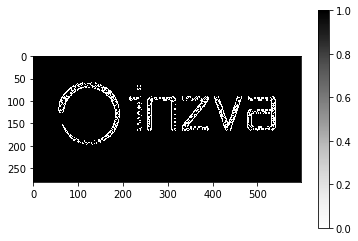

In [0]:
#Predict
img = img.reshape((1,282,598,1))
pred = model.predict(img)
pred = pred.reshape(282,598)

#Take absolute
pred = np.absolute(pred)

#Clip
predclipped = np.clip(pred,0,1)
predneg = predclipped * -1 + 1

#Plot
imgplot = plt.imshow(predneg,cmap = 'Greys')
plt.colorbar()
plt.show()

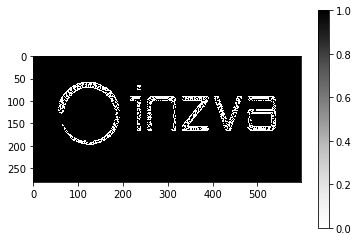

In [0]:
#Define Custom Kernel 2

#Kernel is different!
mykernel2 = [[1,1,1],[0,0,0],[-1,-1,-1]]


mykernel2 = np.array(mykernel2)
mykernel2 = mykernel2.reshape((3,3,1,1))

#Model 2
model2 = Sequential()
model2.add(Conv2D(1,(3,3), input_shape = (282,598,1),use_bias = False,padding='same'))

#Set Custom Kernel 2
model2.layers[0].set_weights([mykernel2])

#Predict
pred2 = model2.predict(img)
pred2 = pred2.reshape(282,598)

#Take absolute
pred2 = np.absolute(pred2)

#Clip
predclipped2 = np.clip(pred2,0,1)
predneg2 = predclipped2 * -1 + 1

#Plot

imgplot = plt.imshow(predneg2,cmap = 'Greys')
plt.colorbar()
plt.show()

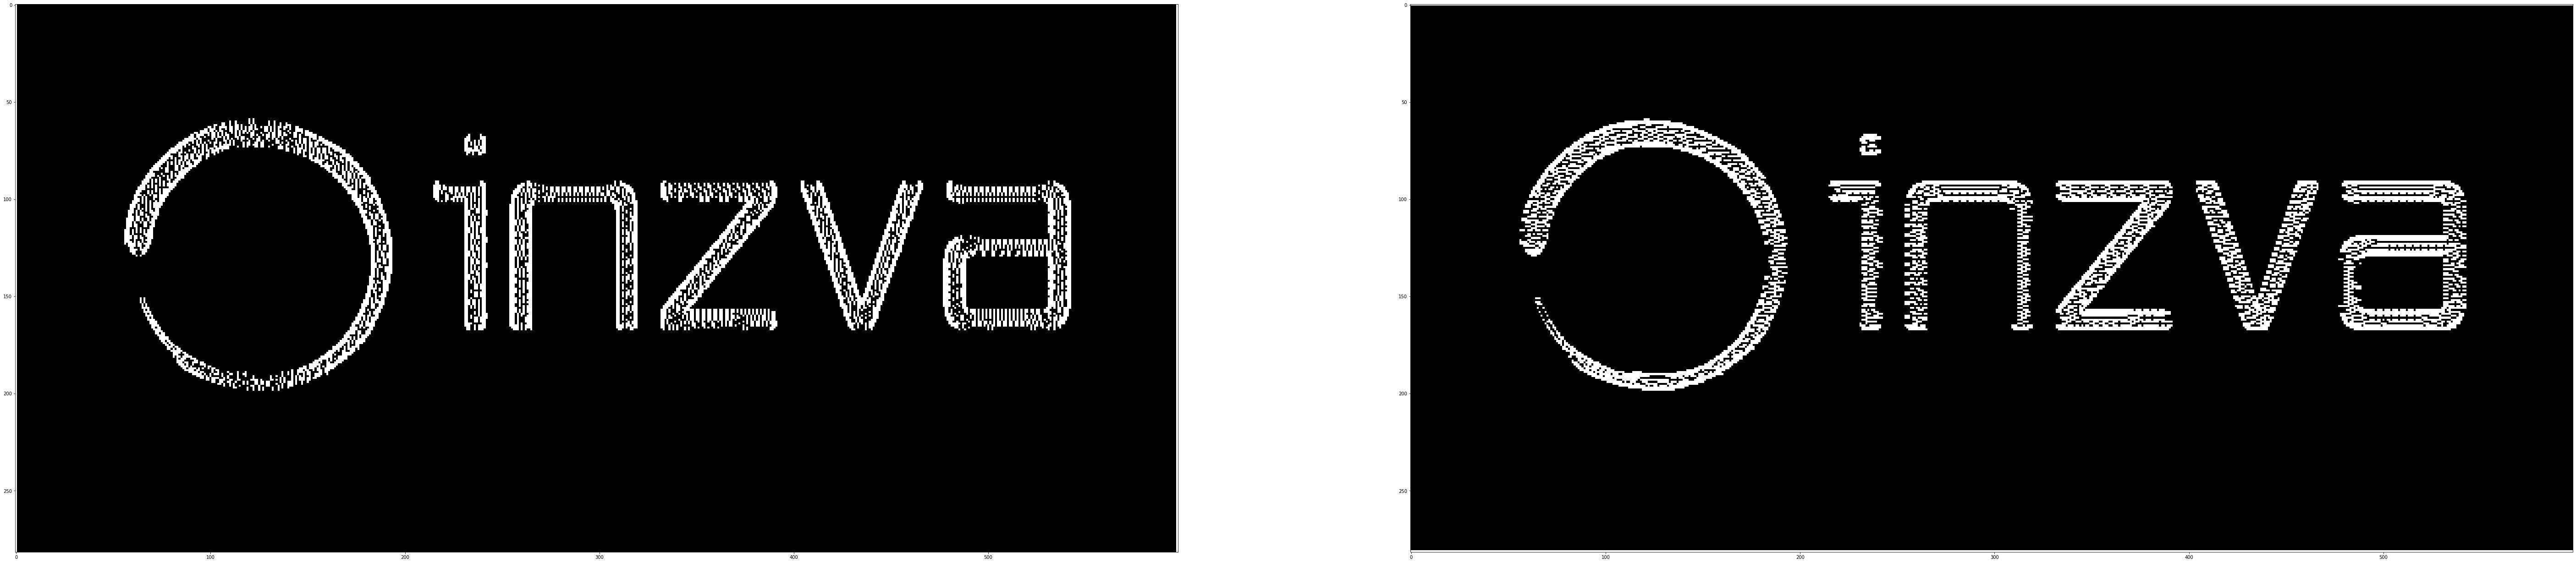

In [0]:
#Plot them next to each other

predlist = [predneg,predneg2]
fig = plt.figure()
fig.set_size_inches(100, 50)


for index,item in enumerate(predlist):
        fig.add_subplot(1,2,index+1)
        plt.imshow(item,cmap = 'Greys')
        
        
plt.show()

Questions:

1- What happens as we change the kernel size?

2- What happens as we change the stride?

3- What happens as we change padding?

4- What happens if we dont take the absolute value of predictions before clipping?

5- What happens if we use a Sobel or Scharr filter instead of a default edge detector filter?
